# Charts

Siddharth Nayak (University of Auckland)

# Introduction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import matplotlib.ticker as mticker
import itables
from itables import show
data = pd.read_csv('P00000001-ALL.csv')
df =data.dropna(subset=['contbr_st'])

/var/folders/wb/_9jpjsld4kd4wj6gm2k1hnnc0000gn/T/ipykernel_27576/2158214038.py:8: DtypeWarning:

Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.


It contains all the charts

In [2]:
df_positive= df[df["contb_receipt_amt"]>0]
total_contribution_amount= float(df["contb_receipt_amt"].sum())
adjustment_percentage= round(((float(df_positive["contb_receipt_amt"].sum())/total_contribution_amount)-1)*100,2)
bins = [-500000, 0, 100, 3000,500000]
labels = ['Negative','Small (0-100)', 'Medium (100-3000)','Wealthy(3000-5000000)']

df['contb_bins'] = pd.cut(df['contb_receipt_amt'], bins=bins, labels=labels)

donation_bin = df['contb_bins'].value_counts()
donation_bin

/var/folders/wb/_9jpjsld4kd4wj6gm2k1hnnc0000gn/T/ipykernel_27576/787325381.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


contb_bins
Small (0-100)            631312
Medium (100-3000)        358314
Negative                  10256
Wealthy(3000-5000000)      1839
Name: count, dtype: int64

/var/folders/wb/_9jpjsld4kd4wj6gm2k1hnnc0000gn/T/ipykernel_27576/1532514850.py:22: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.


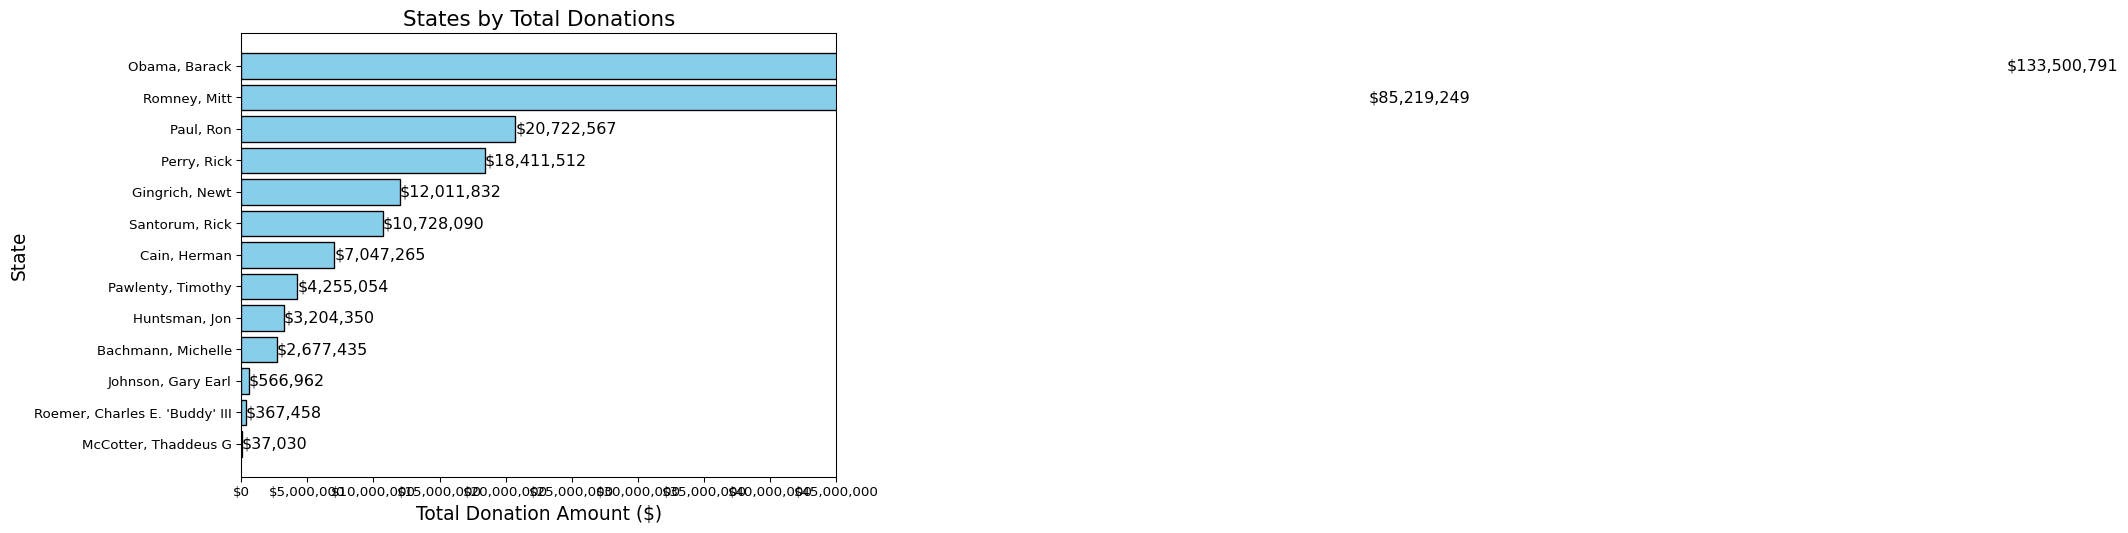

In [3]:
#| label: fig-figures
#| fig-cap: 'A line plot '
df_total_cont = df.groupby(by="cand_nm")["contb_receipt_amt"].sum().reset_index()
df_total_cont = df_total_cont.sort_values(by='contb_receipt_amt')
plt.figure(figsize=(8,6))
bars = plt.barh(df_total_cont['cand_nm'], df_total_cont['contb_receipt_amt'], color='skyblue', edgecolor='black')
plt.title('States by Total Donations', fontsize=16)
plt.xlabel('Total Donation Amount ($)', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.xlim(0, 45000000);


for bar in bars:
    plt.text(
        bar.get_width(),                    
        bar.get_y() + bar.get_height() / 2,
        f'${bar.get_width():,.0f}',         
        va='center',                       
        ha='left',                          
        fontsize=12                         
    );

plt.tight_layout();
plt.show();

In [4]:
#| label: fig-Statewisecontribution
#| fig-cap: 'Statewise Contribution '
df_state_contribution = df.groupby(["contbr_st"]).agg({"contb_receipt_amt":"sum"}).reset_index()
fig = px.choropleth(df_state_contribution,locations="contbr_st", locationmode="USA-states", color="contb_receipt_amt",
    scope="usa",
    color_continuous_scale='plasma',
    labels={'cand_nm': 'Candidate Name','contb_receipt_amt': 'Total contribution'},hover_data="contb_receipt_amt",title="Total Contribution Statewise heatmap")
fig.update_layout(
    coloraxis_colorbar=dict(
        title="Total Contribution",
        orientation='h', 
        x=0.6,                       
        y=-0.3                     
    )
)

In [5]:
#| label: fig-retired
#| fig-cap: 'retired '
df_retired= df[df["contbr_occupation"]=="RETIRED"]
df_retired=df_retired.groupby(["cand_nm","contbr_st"]).agg({"contb_receipt_amt":"sum"}).reset_index()
#df_retired
df_retired_max= df_retired.groupby(["contbr_st"]).agg({ "contb_receipt_amt":"max"}).reset_index()
df_retired_max
df_retired_merge = pd.merge(df_retired_max,df_retired , on=["contbr_st", "contb_receipt_amt"], how="left")

fig = px.choropleth(df_retired_merge,locations="contbr_st", locationmode="USA-states", color="cand_nm",
    scope="usa",
    color_continuous_scale='plasma',
    labels={'cand_nm': 'Candidate Name'},hover_data="contb_receipt_amt",title="Highest contribution earned by a candidate statewise from Retired")
fig.show()

# Literature Review

hello

# Data

data

# Conclusion

hhgh

## Section

This is a simple placeholder for the manuscript’s main document
\[@knuth84\].